<a href="https://colab.research.google.com/github/NkululekoCyrilCele/Projects/blob/main/Deep%20Learning/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction with Neural Networks

In this project, we will build a neural network and use it as our predictive model. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#%load_ext autoreload
#%autoreload 2
#%config InlineBackend.figure_format = "retina"

import warnings
warnings.filterwarnings("ignore")

In [ ]:
hour = "/workspaces/Projects/Deep Learning/hour.csv"
day = "/workspaces/Projects/Deep Learning/hour.csv"

In [4]:
hour = pd.read_csv(hour)
day = pd.read_csv(day)

FileNotFoundError: [Errno 2] No such file or directory: 'Deep Learning/hour.csv'

In [ ]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
print(day.shape, hour.shape)

(731, 16) (17379, 17)


In [ ]:
data = pd.concat([hour, day], ignore_index=True)

In [ ]:
data.shape

(18110, 17)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().values.sum()

731

In [ ]:
data.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [ ]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
18105,727,2012-12-27,1,1,12,NaN,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
18106,728,2012-12-28,1,1,12,NaN,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
18107,729,2012-12-29,1,1,12,NaN,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
18108,730,2012-12-30,1,1,12,NaN,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
18109,731,2012-12-31,1,1,12,NaN,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
data = data.dropna()

In [ ]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19.0,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20.0,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21.0,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22.0,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23.0,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [ ]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
data["hr"] = data["hr"].astype(int)

In [ ]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

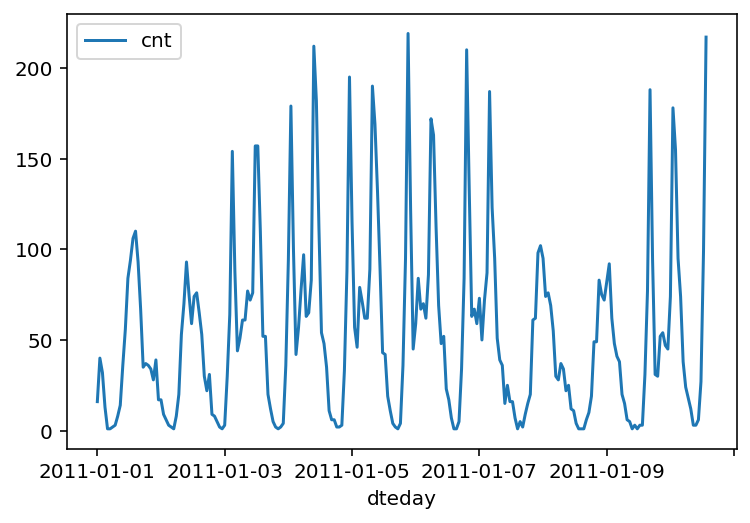

In [ ]:
data[:24*10].plot(x="dteday", y="cnt")

In [ ]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
data.dteday.value_counts()

2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: dteday, Length: 731, dtype: int64

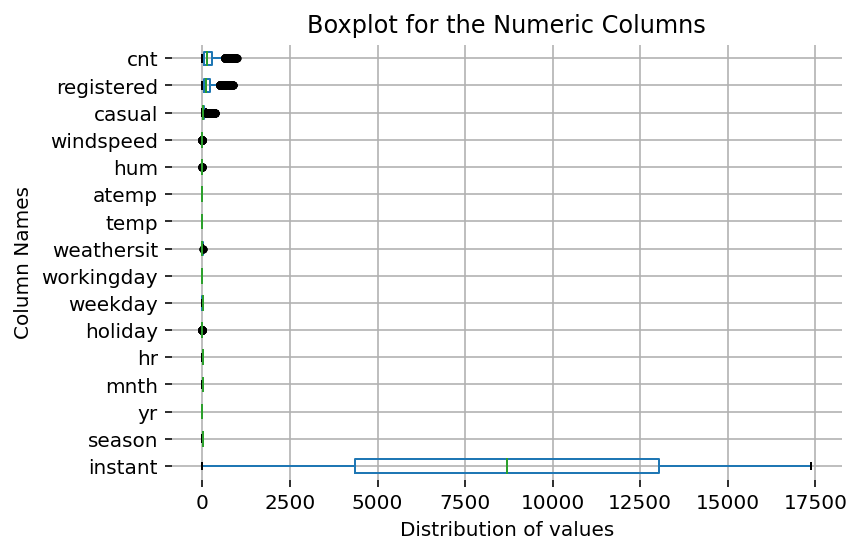

In [ ]:
data.boxplot(column= ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
                           'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
                           'casual', 'registered', 'cnt'], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

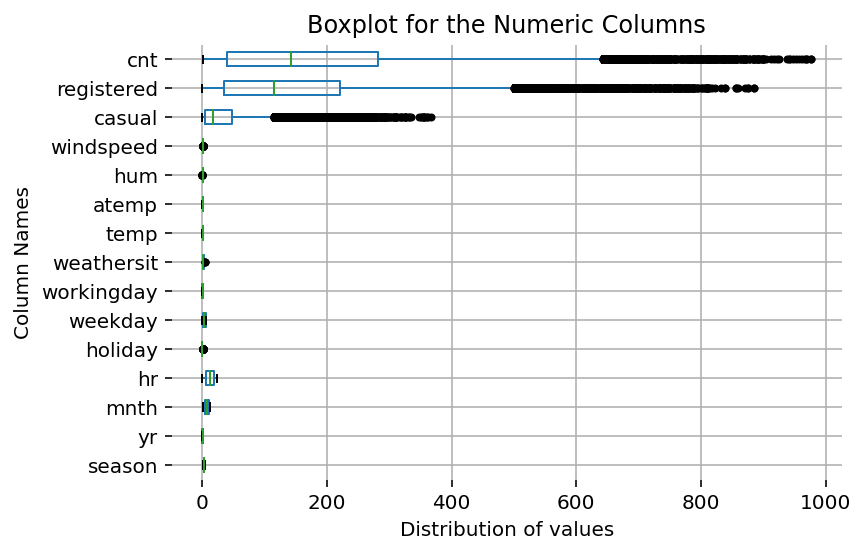

In [ ]:
data.boxplot(column= ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
                           'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
                           'casual', 'registered', 'cnt'], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

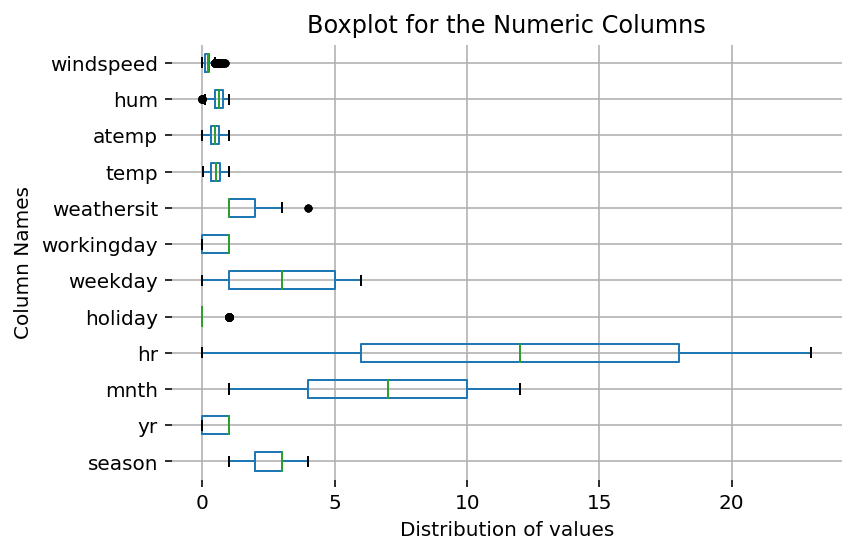

In [ ]:
data.boxplot(column= ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
                           'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

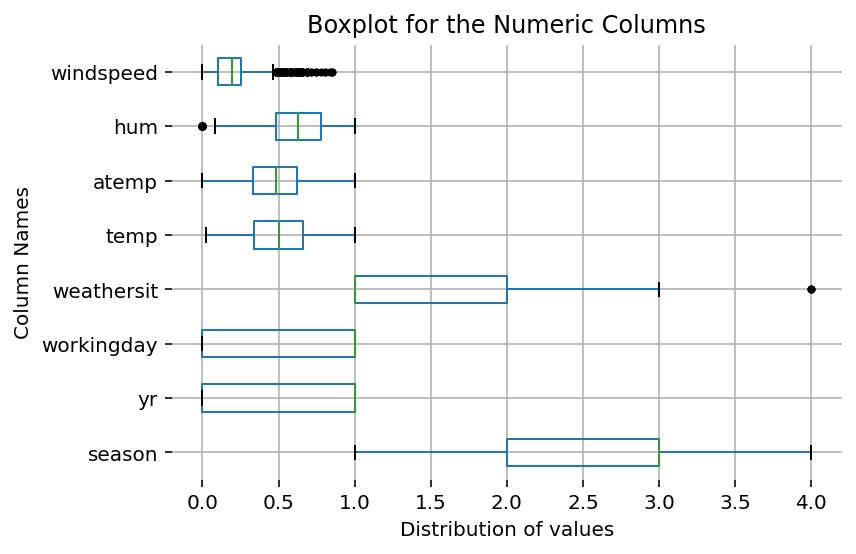

In [ ]:
data.boxplot(column= ['season', 'yr', 'workingday', 'weathersit', 'temp',
                      'atemp', 'hum', 'windspeed',], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

In [ ]:
len(data[data["weathersit"] == 4])

3

In [ ]:
data[data["weathersit"] == 4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35.0,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158.0,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22.0,23


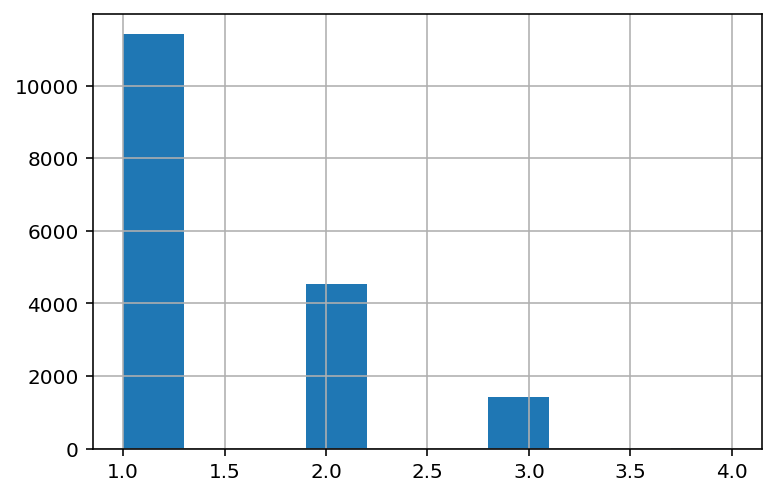

In [ ]:
data.weathersit.hist()

In [ ]:
data = data[data["weathersit"] != 4]

In [ ]:
data.shape

(17376, 17)

In [ ]:
len(data[data["hum"] == 0])

22

In [ ]:
data[data["hum"] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0.0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2.0,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1.0,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2.0,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12.0,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36.0,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43.0,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23.0,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17.0,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5.0,11


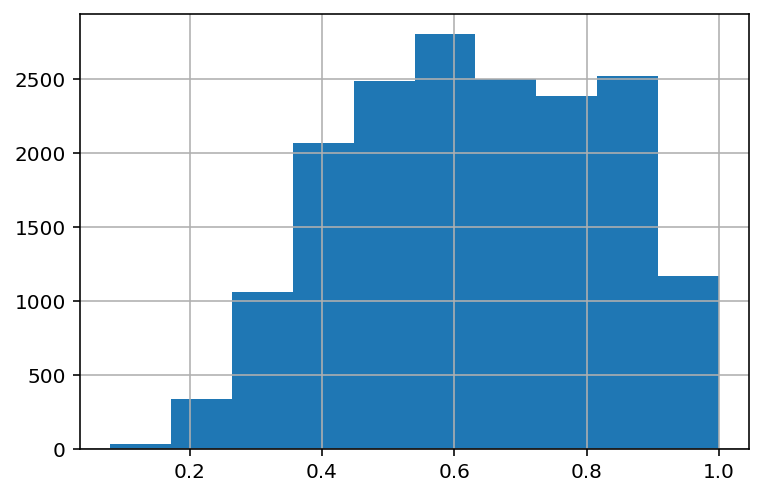

In [ ]:
data.hum.hist()

In [ ]:
data = data[data["hum"] != 0]

In [ ]:
data.shape

(17354, 17)

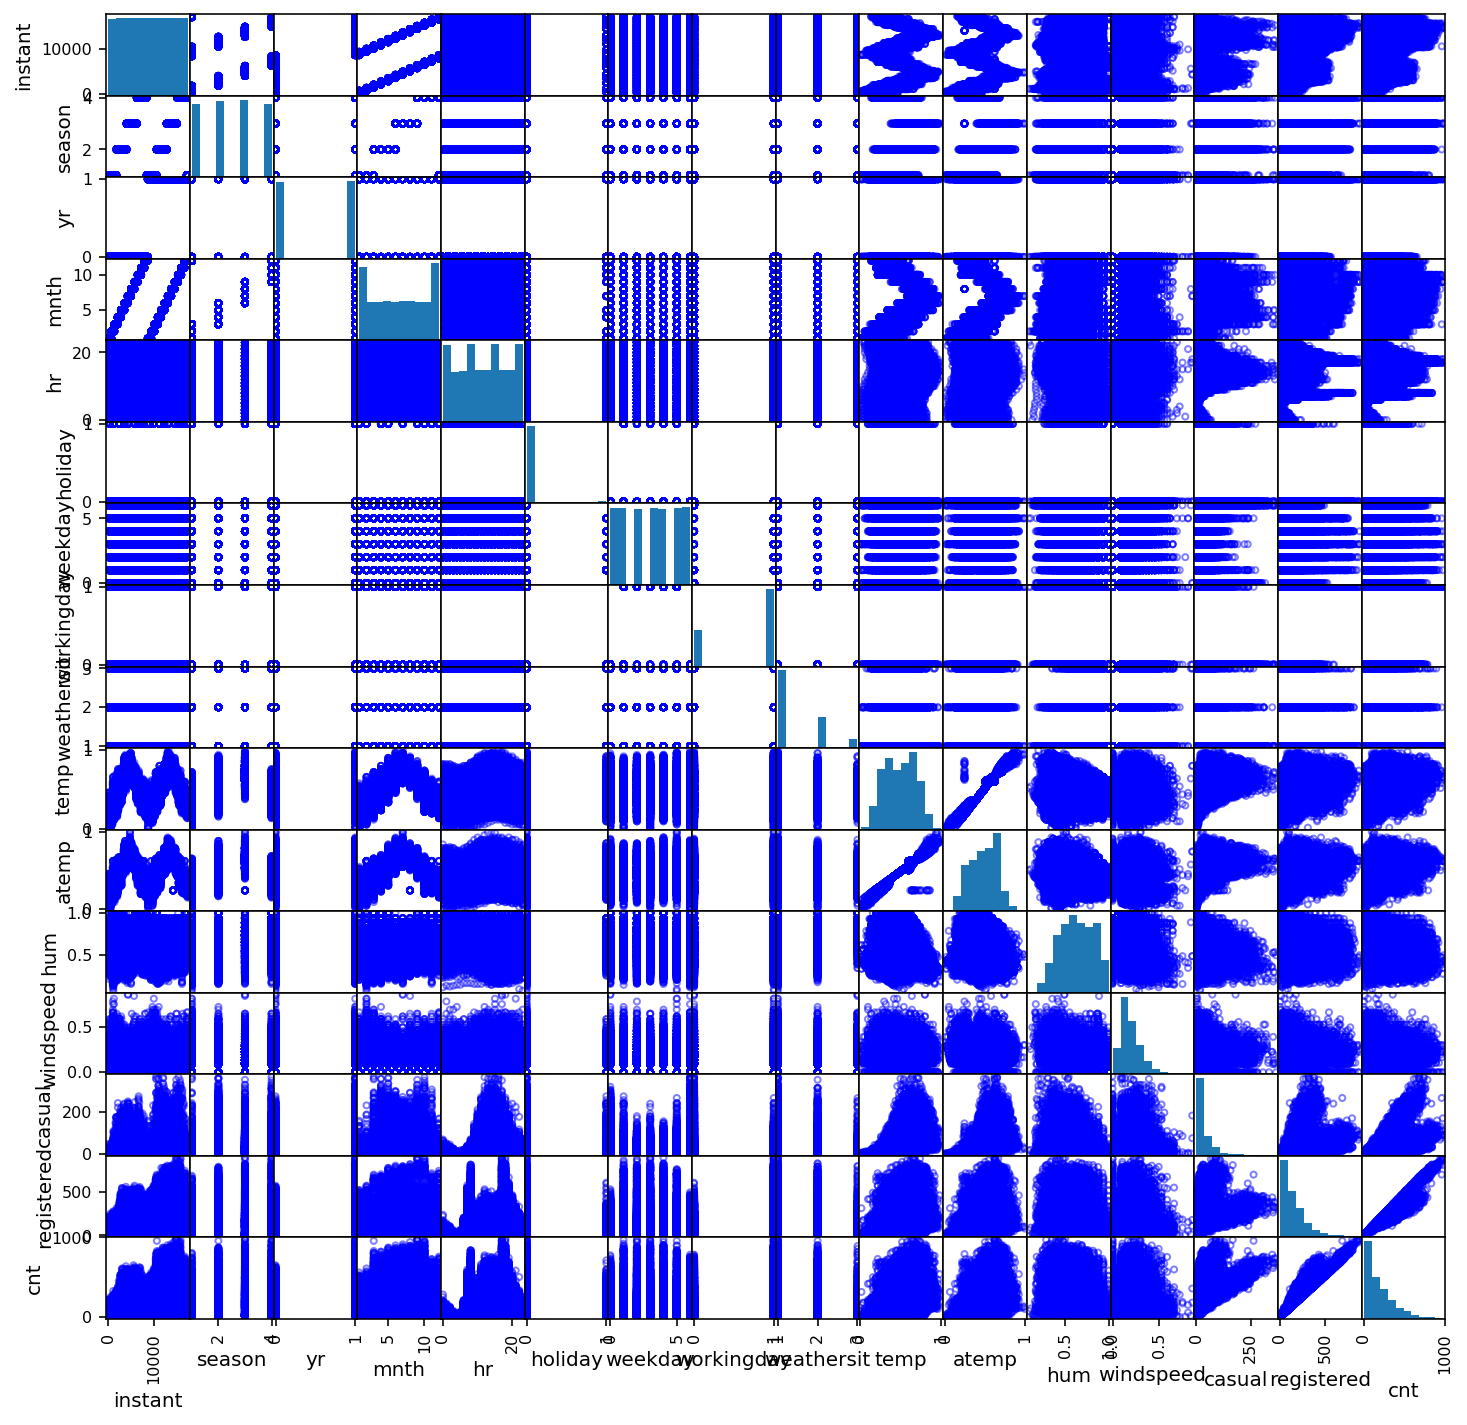

In [ ]:
_ = pd.plotting.scatter_matrix(data, figsize = (12,12), c = "none", edgecolor = "blue")